In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn

## Dividing Plotting Functions into "Figure-Level" and "Axis-Level" Units

Matplotlib's Figures are made up of nested parts:

  - **Figure**: The whole window  (`plt.Figure()` or `plt.figure()`)
    - **Super Title**: The figure's title (`Figure.suptitle()`)
    - **Size**: The figure's width and height ('Figure(figsize=(8, 5))` or `Figure.set_figwidth()` or `Figure.set_figheight()`)
    - **Resolution in Dots per Inch**: The figure's print resolution (`Figure(dpi=200)`)
    - **Axes**: The subplots in the window.  (`Figure.add_axes([left, bottom, widght, height])` or `Figure.add_subplot(rows, cols, index)`
      - **Title**: Title (`Axes.set_title()`)
      - **X Limits**: The range of data shown in the x axis (`Axes.set_xlim()`)
      - **Y Limits**: The range of data shown in the y axis (`Axes.set_ylim()`)
      - **Legend**: A legend (`Axes.legend()`)
      - **Artist Data**: When plots are added, various containers of lines, patches, markers, text, etc are added to the Axes, depending on the type of plot.  The best way to access this data is to get the output of the original plotting function.
      - **Plot Methods**: Commands to plot some data! This list is best found at https://matplotlib.org/stable/api/axes_api.html#plotting
      
Like Matplotlib, Seaborn has two main kinds of functions:  

  - **Figure-Level** Functions (makes a `Figure` and all the `Axes` inside it) 
  - **Axes-Level** Functions (makes an `Axes`)
  
Figure-level functions are useful if you want Seaborn to make subplots for you; they tell Seaborn which Axes-level function to call under the hood.  If you want to manage subplots seperately, then Axes-level functions may be a better way to go. 

If you look on Seaborn's documentation, you'll see that within each type of plot, there is one Figure-level function that can call one of several Axes-level functions: https://seaborn.pydata.org/api.html


![](https://matplotlib.org/2.0.2/_images/anatomy1.png)

### Figure-Level Functions: [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html), [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html), and [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html)

Most of Seaborn's plotting functions have a consistent syntax:

`plot_fun(data=pd.DataFrame, **property:column_name)`, with `property` being any of several properties of a graph:

  - `x`: the column plotted on the x axis
  - `y`: the column plotted on the y axis
  - `hue`: the column whose values are represented by the **color** of the data plotted
  - `style`: if markers are used, the column whose values are represented by the style of the marker
  - `row`: the column whose values determine which subplot row the data is plotted
  - `col`: the column whose values determine which subplot column the data is plotted
  
For example: `sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm')`

**Kind** is very useful for Figure-level seaborn plotting functions, since it selects the type of plot that is made:
  - **catplot kinds**: bar, point, violin, box, boxen, strip, swarm
  - **displot kinds**: hist, kde, ecdf.   (also, try adding `rug=True`)

**Important**: Which plot function you use depends on whether the variables are continuous or categorical, and whether you want to emphasize their means or their distributions.

**Exercises**

Using only Figure-level plotting functions `relplot()`, `displot()`, and `catplot()` and the penguin dataset, answer the questions below.

In [ ]:
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Does the body mass differ between penguin sexes?

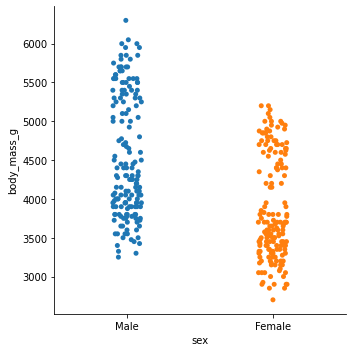

In [ ]:
sns.catplot(data=df, x='sex', y='body_mass_g');

Does the length of the bill differ between penguin species?

Does the length of the bill differ between penguin sexes?

What's the distribution of the bill lengths among the penguins in this dataset?

How does the distribution of bill lengths differ between penguins of each species? (Hint: hue or col)

With displot:

With catplot:

Does the length of the bill correlate with the depth of the bill for penguins?

Does the overall shape of the bill (length and depth, together) differ between penguin species?

With displot:

With relplot:

How does body mass relate to the overal shape of the bill (length and depth) for each penguin species? 

With relplot:

Does the above relationships differ for males and females?

Does the flipper length vary with body mass?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

Does the flipper length vary with body mass, when species and sex are taken into account (i.e. if I feed my pet penguin more, will its flippers get longer)?

## Seaborn's Axis-Level Plotting Functions and Using Matplotlib to manage the subplots


  - Want to build your own custom plots, combining different seaborn and matplotlib plots into something nice?
  - Want to use seaborn for making subplots?

Then we can't use seaborn's Figure-level plotting functions; they take over too much of the figure management.  The rest of Seaborn's plotting functions are "Axis"-level; they plot into either the currently-active Matpltolib Axis, or into an Axis you specify.  

Take a look at [Seaborn's API Docs](https://seaborn.pydata.org/api.html); most of the functions are very specific about what type of plot will be made!  As long as it doesn't say it's a Figure-level function, it's an axis-level function.

A good approach here is to make a matplotlib Figure object with `fig = plt.Figure()`, make the Axis from it (using `fig.add_subplot()` or even better, `fig.subplots()`), then give the axis to the function with the parameter`ax=`.  Example below:


**Exercises**

Using only **Axis-level** plotting functions, answer the following questions:

Does the length of the bill differ between penguin species?  

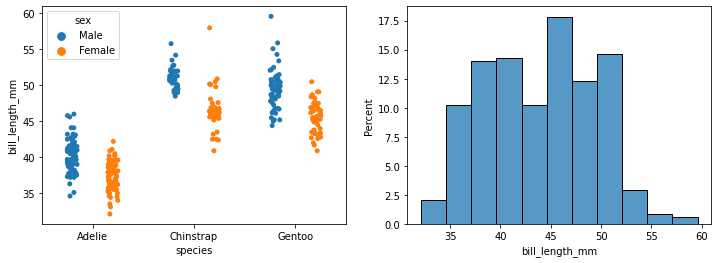

In [ ]:
fig = plt.Figure(figsize=(12, 4))
axes = fig.subplots(1, 2)
sns.stripplot(data=df, x='species', y='bill_length_mm', hue='sex', dodge=True, ax=axes[0])
sns.histplot(data=df, x='bill_length_mm', ax=axes[1], stat='percent')
# fig.tight_layout()
fig

Does the length of the bill differ between penguin sexes?  Make 3 different subplots that examine bill length and sex.

Does the overall shape of the bill (length and depth, together) differ between penguin species?  Make 4 different subplots that show this relationship.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0b87bd1-b327-49a5-9ccb-1e15aa1cbe83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>